In [1]:
import numpy as np

from dijkstra import Network

distance_matrix = np.array(
    [[0.0, 4.0, 0.0, 2.0, 0.0],
     [0.0, 0.0, 5.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 3.0],
     [0.0, 1.0, 0.0, 0.0, 6.0],
     [0.0, 0.0, 0.0, 0.0, 0.0]]
)
node_names = list("ABCDE")

In [2]:
network = Network(distance_matrix,node_names)

In [3]:
import json
test = network.get_shortest_distances('A')
print(json.dumps(test,indent=2))

{
  "A": {
    "distance": 0,
    "route": [
      "A"
    ]
  },
  "B": {
    "distance": 3.0,
    "route": [
      "A",
      "D",
      "B"
    ]
  },
  "D": {
    "distance": 2.0,
    "route": [
      "A",
      "D"
    ]
  },
  "E": {
    "distance": 8.0,
    "route": [
      "A",
      "D",
      "E"
    ]
  },
  "C": {
    "distance": 8.0,
    "route": [
      "A",
      "D",
      "B",
      "C"
    ]
  }
}


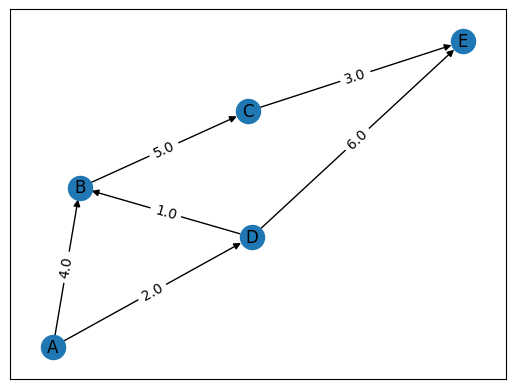

In [4]:
network.draw_graph()

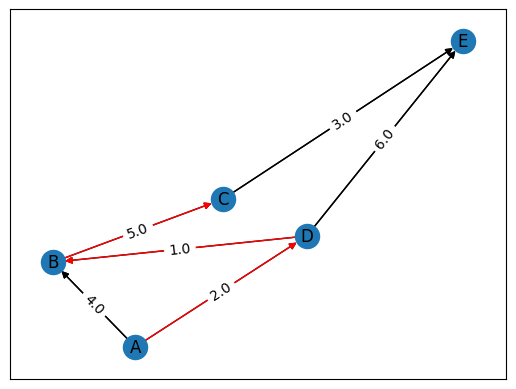

In [13]:
network.highlight_fastest_path('A','C')

Text(50.722222222222214, 0.5, 'Node from')

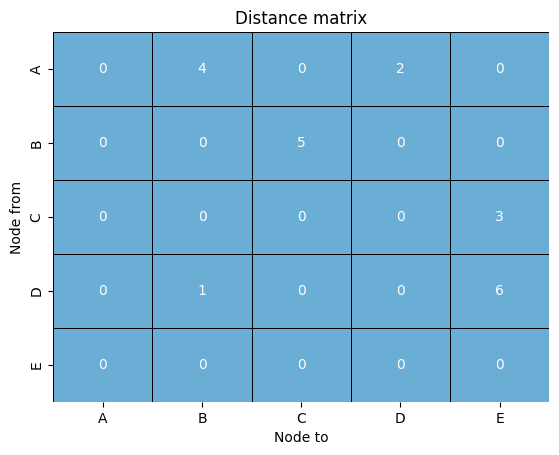

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(distance_matrix, xticklabels = node_names,yticklabels = node_names, annot=True, vmin = -1000, vmax = 1000, cbar=False, linecolor='black',linewidths = .5, cmap = 'Blues')
plt.title("Distance matrix")
plt.xlabel("Node to")
plt.ylabel("Node from")

{('A', 'B'): Text(-0.2383068969067349, 0.7393998535497701, '4.0'),
 ('A', 'D'): Text(-0.21557601141033994, -0.0001456995903820757, '2.0'),
 ('B', 'C'): Text(0.10005438405974378, 0.4973948335771167, '5.0'),
 ('C', 'E'): Text(0.2608771075880443, -0.4998543004096178, '3.0'),
 ('D', 'B'): Text(-0.06787130685901285, 0.26045444685984787, '1.0'),
 ('D', 'E'): Text(0.0929514166692876, -0.7367946871268867, '6.0')}

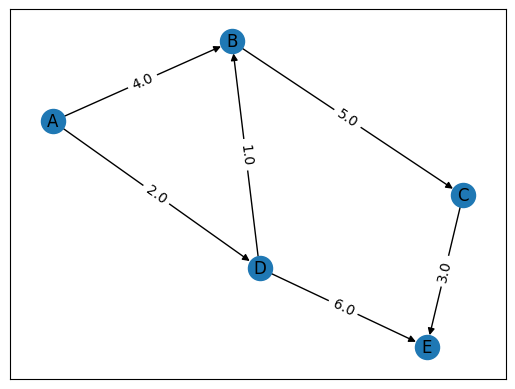

In [7]:
import networkx as nx

graph = nx.DiGraph(distance_matrix)
graph = nx.relabel_nodes(
    graph,
    {
        node_index: node_name
        for node_index, node_name in zip(range(len(node_names)), node_names)
    },
)
pos = nx.spring_layout(graph)  # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(graph, pos)
labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

In [8]:
graph.edges

OutEdgeView([('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'B'), ('D', 'E')])

In [9]:
import matplotlib.pyplot as plt
cmap=plt.cm.viridis(np.linspace(0,1,graph.number_of_edges()))

In [10]:
cmap

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [11]:
list(graph.edges)

[('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'B'), ('D', 'E')]